### Load libraries

In [1]:
library(tidyverse)
library(stringr)
library(microViz)
library(metagMisc)
library(phylosignal)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(vegan)
library(ape)
library(lattice)
library(permute)
library(grid) 
library(knitr)
library(phyloseq)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.9     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.4.1
✔ ggplot2   3.3.6     ✔ tibble    3.2.1
✔ lubridate 1.8.0     ✔ tidyr     1.2.1
✔ purrr     0.3.5     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

microViz version 0.9.6 - Copyright (C) 2022 David Barnett
* Website: https://david-barnett.github.io/microViz/
* Useful? For citation info, run: citation('microViz')
* Silence: suppressPackageStartupMessages(library(microViz))



Attaching package: ‘metagMisc’


The following object is masked

In [2]:
library(cowplot)

```{r, echo=FALSE, results='hide'}
opts_chunk$set(cache=FALSE,warning=FALSE)
```

### Setup for plot labels

### Setup labels

In [4]:
#Setup for label sizes in plots
labels.x=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18,vjust=1,hjust=1,angle=45))

labels.x.pca=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18)) 

labels.y=theme(axis.title.y = element_text(size=18),
               axis.text.y= element_text(size=18))

labels.legend=theme(legend.text = element_text (size=18),
                    legend.title = element_text(size=18))

### Declare conflict preferences

In [5]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


### Source functions

In [96]:
#Import functions for plots
source("../FlagellinDiversity/plots_functions.r")

## Phyloseq analyses

In [6]:
nonrare.psAll.filt = readRDS("filter_taxa_All_count_subsampled.opt2.rds")

In [7]:
nonrare.psAll.filt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 443 samples ]
sample_data() Sample Data:       [ 443 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1637 internal nodes ]

In [8]:
subset.host=subset_samples(nonrare.psAll.filt,biome_1=="Host-associated")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [9]:
subset.host

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 344 samples ]
sample_data() Sample Data:       [ 344 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1637 internal nodes ]

### Richness plots

In [10]:
values.plot=c("#e64b35b2","#4dbbd5b2","#00a087b2","#3c5488b2","#f39b7fb2","#8491b4b2")#,"#91d1c2b2","#dc0000b2","#7e6148b2")
breaks.plot=c("Actinopterygii","Amphibia","Aves","Mammalia","Plants","Reptilia")

In [11]:
richness.estimates.host=mutate(as_tibble(subset.host@sam_data),estimate_richness(subset.host, split = TRUE, measures = c("Observed","Chao1","Shannon","Simpson")))

In [12]:
head(richness.estimates.host)

Sample     Dataset      biome_0 biome_1         biome_2       
1 ERS1065341 MGYS00000631 root    Host-associated Mammalia      
2 ERS1353919 MGYS00001254 root    Host-associated Mammalia      
3 ERS1353922 MGYS00001254 root    Host-associated Mammalia      
4 ERS1474385 MGYS00001380 root    Host-associated Mammalia      
5 ERS1579927 MGYS00001583 root    Host-associated Actinopterygii
6 ERS1579933 MGYS00001583 root    Host-associated Actinopterygii
  biome_3          biome_4         family     category mammals  Observed
1 Digestive system Stomach         Bovidae    Animal   Mammalia 605     
2 Digestive system Large intestine Cricetidae Animal   Mammalia 411     
3 Digestive system Large intestine Cricetidae Animal   Mammalia 398     
4 Digestive system Fecal           Muridae    Animal   Mammalia 175     
5 Digestive system Foregut         Salmonidae Animal   Others    11     
6 Digestive system Foregut         Salmonidae Animal   Others    14     
  Chao1    se.chao1  Shannon  Simpson  
1 962.6164 65.796443 5.132902 0.9870500
2 629.3333 53.628122 4.293173 0.9487211
3 560.5556 37.994061 4.708263 0.9656202
4 229.4737 21.590704 4.197060 0.9731164
5  16.0000  5.502525 1.975403 0.7959184
6  16.5000  2.891158 1.751929 0.6597463

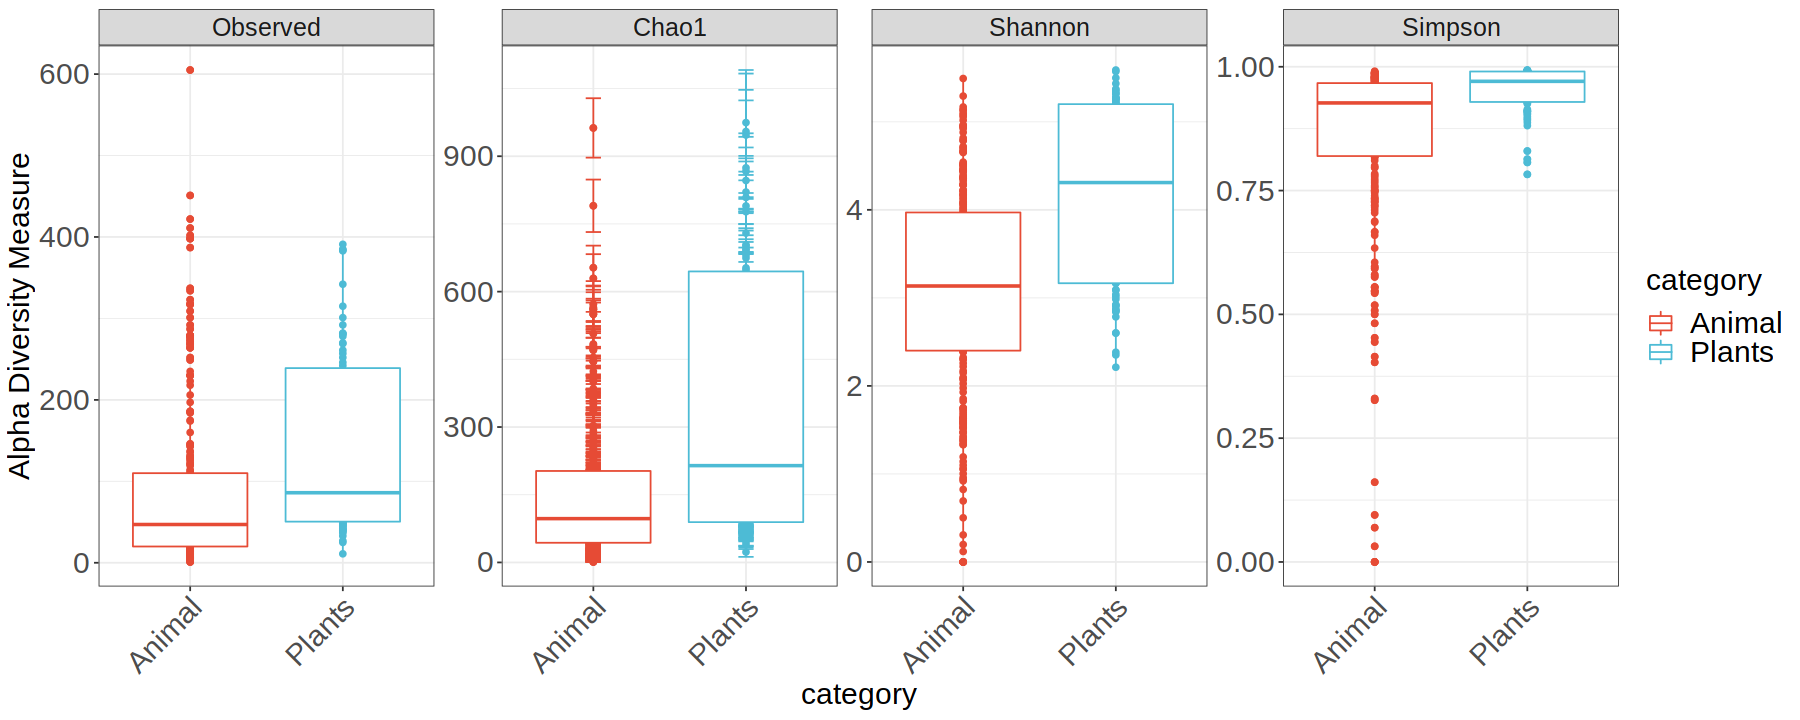

In [13]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(subset.host,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
geom_boxplot()+
theme_bw()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

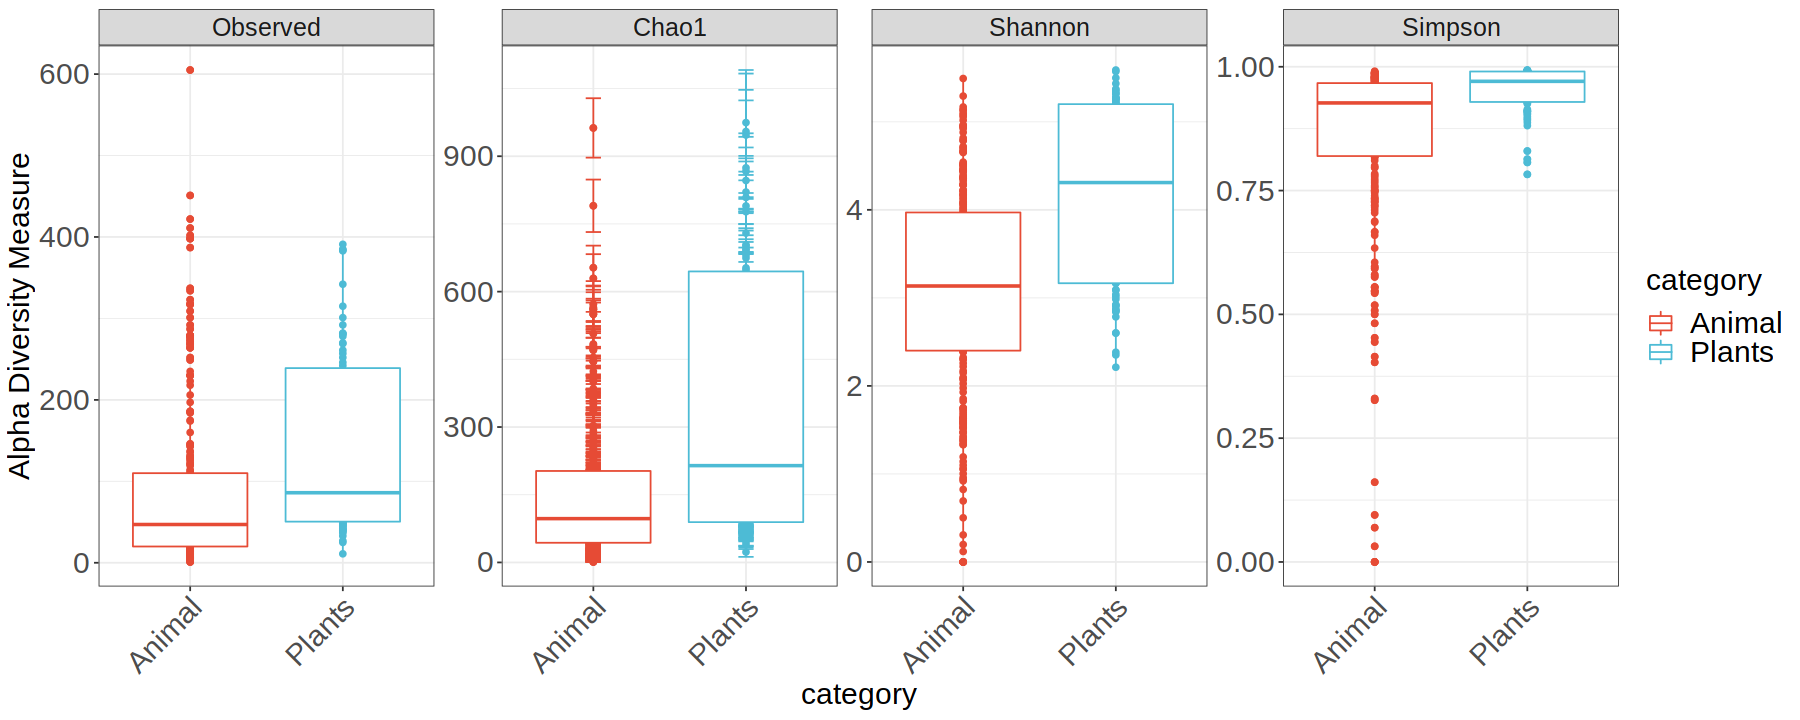

In [14]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(subset.host,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
geom_boxplot()+
theme_bw()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

### Statistics on richness estimates

#### I. Kruskal tests by category

In [15]:
kruskal.test(Observed~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by category
Kruskal-Wallis chi-squared = 24.169, df = 1, p-value = 8.825e-07


In [16]:
kruskal.test(Chao1~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by category
Kruskal-Wallis chi-squared = 31.009, df = 1, p-value = 2.568e-08


In [17]:
kruskal.test(Shannon~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by category
Kruskal-Wallis chi-squared = 35.371, df = 1, p-value = 2.725e-09


In [18]:
kruskal.test(Simpson~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by category
Kruskal-Wallis chi-squared = 38.109, df = 1, p-value = 6.692e-10


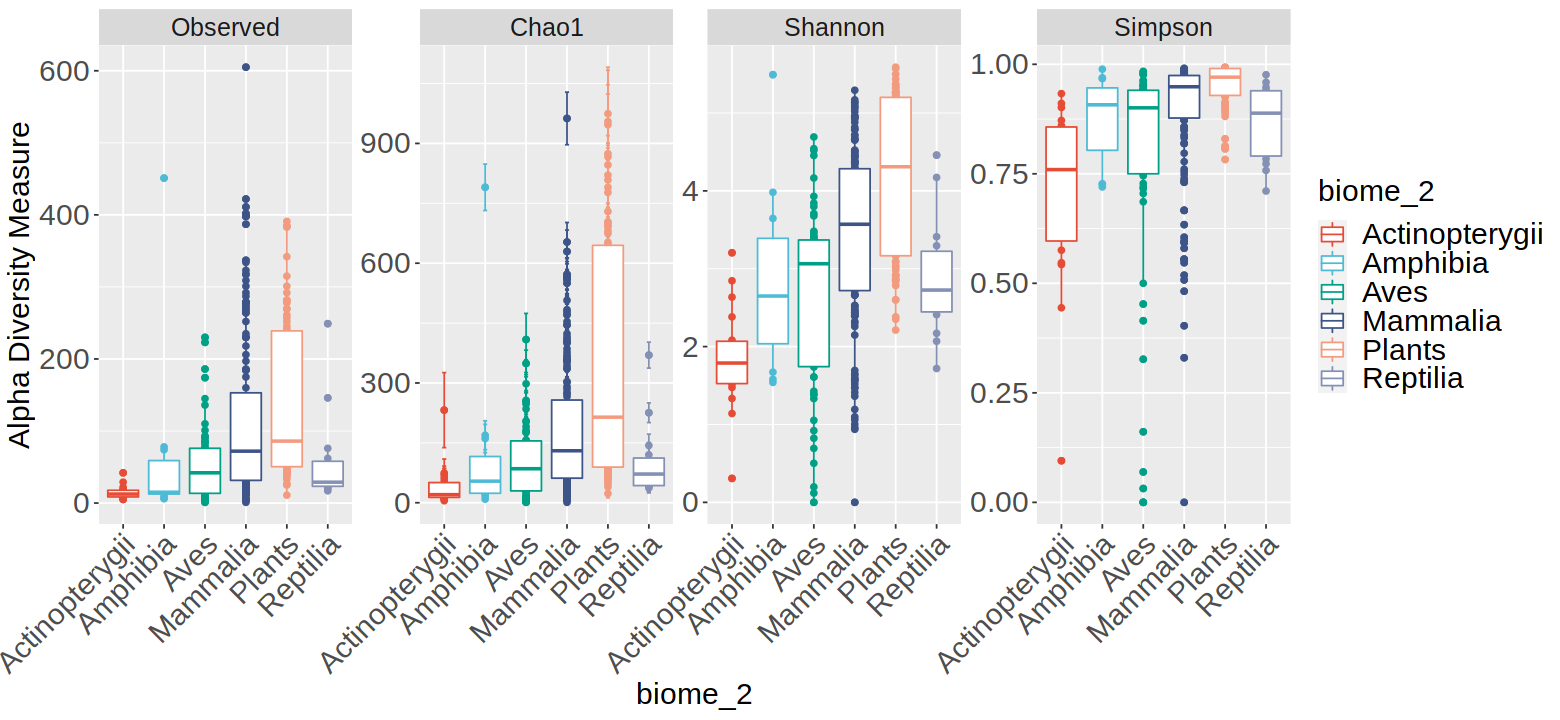

In [19]:
options(repr.plot.width=13,repr.plot.height=6)
plot_richness(subset.host,x="biome_2",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_2")+
geom_boxplot()+
scale_color_npg()+#scale_color_manual(values=values.plot,breaks=breaks.plot)+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

#### II. Kruskal test by biome_2

In [20]:
dplyr::count(richness.estimates.host,biome_2)

biome_2        n  
1 Actinopterygii  18
2 Amphibia        11
3 Aves            63
4 Mammalia       163
5 Plants          75
6 Reptilia        14

In [21]:
kruskal.test(Observed~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by biome_2
Kruskal-Wallis chi-squared = 68.668, df = 5, p-value = 1.94e-13


In [22]:
kruskal.test(Chao1~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by biome_2
Kruskal-Wallis chi-squared = 63.781, df = 5, p-value = 2.006e-12


In [23]:
kruskal.test(Shannon~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by biome_2
Kruskal-Wallis chi-squared = 74.227, df = 5, p-value = 1.348e-14


In [24]:
kruskal.test(Simpson~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by biome_2
Kruskal-Wallis chi-squared = 72.272, df = 5, p-value = 3.448e-14


#### II. Wilcoxon test by biome_2

In [25]:
pairwise.wilcox.test(richness.estimates.host$Observed, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Observed and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.21210        -        -       -        -      
Aves     0.00230        0.48417  -       -        -      
Mammalia 1.9e-07        0.01887  0.00037 -        -      
Plants   3.1e-09        0.00230  4.1e-07 0.01808  -      
Reptilia 0.00029        0.22827  0.89491 0.05887  0.00062

P value adjustment method: fdr 

In [26]:
pairwise.wilcox.test(richness.estimates.host$Chao1, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Chao1 and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.13195        -        -       -        -      
Aves     0.00333        0.46967  -       -        -      
Mammalia 3.0e-06        0.03457  0.00218 -        -      
Plants   7.9e-08        0.00218  2.2e-06 0.00054  -      
Reptilia 0.00218        0.36608  0.88449 0.07646  0.00134

P value adjustment method: fdr 

In [27]:
pairwise.wilcox.test(richness.estimates.host$Shannon, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  richness.estimates.host$Shannon and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.01875        -        -       -        -      
Aves     0.00640        0.97366  -       -        -      
Mammalia 9.7e-07        0.09490  9.9e-05 -        -      
Plants   8.0e-09        0.00625  3.5e-08 0.00024  -      
Reptilia 0.00061        0.97366  0.97366 0.04366  0.00028

P value adjustment method: fdr 

In [28]:
pairwise.wilcox.test(richness.estimates.host$Simpson, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  richness.estimates.host$Simpson and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.01627        -        -       -        -      
Aves     0.00725        0.85835  -       -        -      
Mammalia 5.8e-06        0.24124  0.00016 -        -      
Plants   1.5e-08        0.00447  1.5e-08 7.4e-05  -      
Reptilia 0.00725        0.85849  0.85849 0.04547  0.00064

P value adjustment method: fdr 

### Beta diversity

### 1. Ordination

In [29]:
#Distance matrices for anosim
jaccard.dist = distance(subset.host,method="jaccard",type="samples")
unifrac.dist = distance(subset.host,method="unifrac",type="samples")
bray.dist = distance(subset.host,method="bray",type="samples")
wunifrac.dist = distance(subset.host,method="wunifrac",type="samples")

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”


In [30]:
jaccard.host = ordinate(subset.host,distance="jaccard",method="PCoA")
unifrac.host = ordinate(subset.host,distance="unifrac",method="PCoA")
bray.host = ordinate(subset.host,distance="bray",method="PCoA")
wunifrac.host = ordinate(subset.host,distance="wunifrac",method="PCoA")

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”


### 2. Plots

#### By category

In [31]:
jaccard.plot = plot_color_discrete(subset.host,jaccard.host,"category")
bray.plot = plot_color_discrete(subset.host,bray.host,"category")
unifrac.plot = plot_color_discrete(subset.host,unifrac.host,"category")
wunifrac.plot = plot_color_discrete(subset.host,wunifrac.host,"category")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


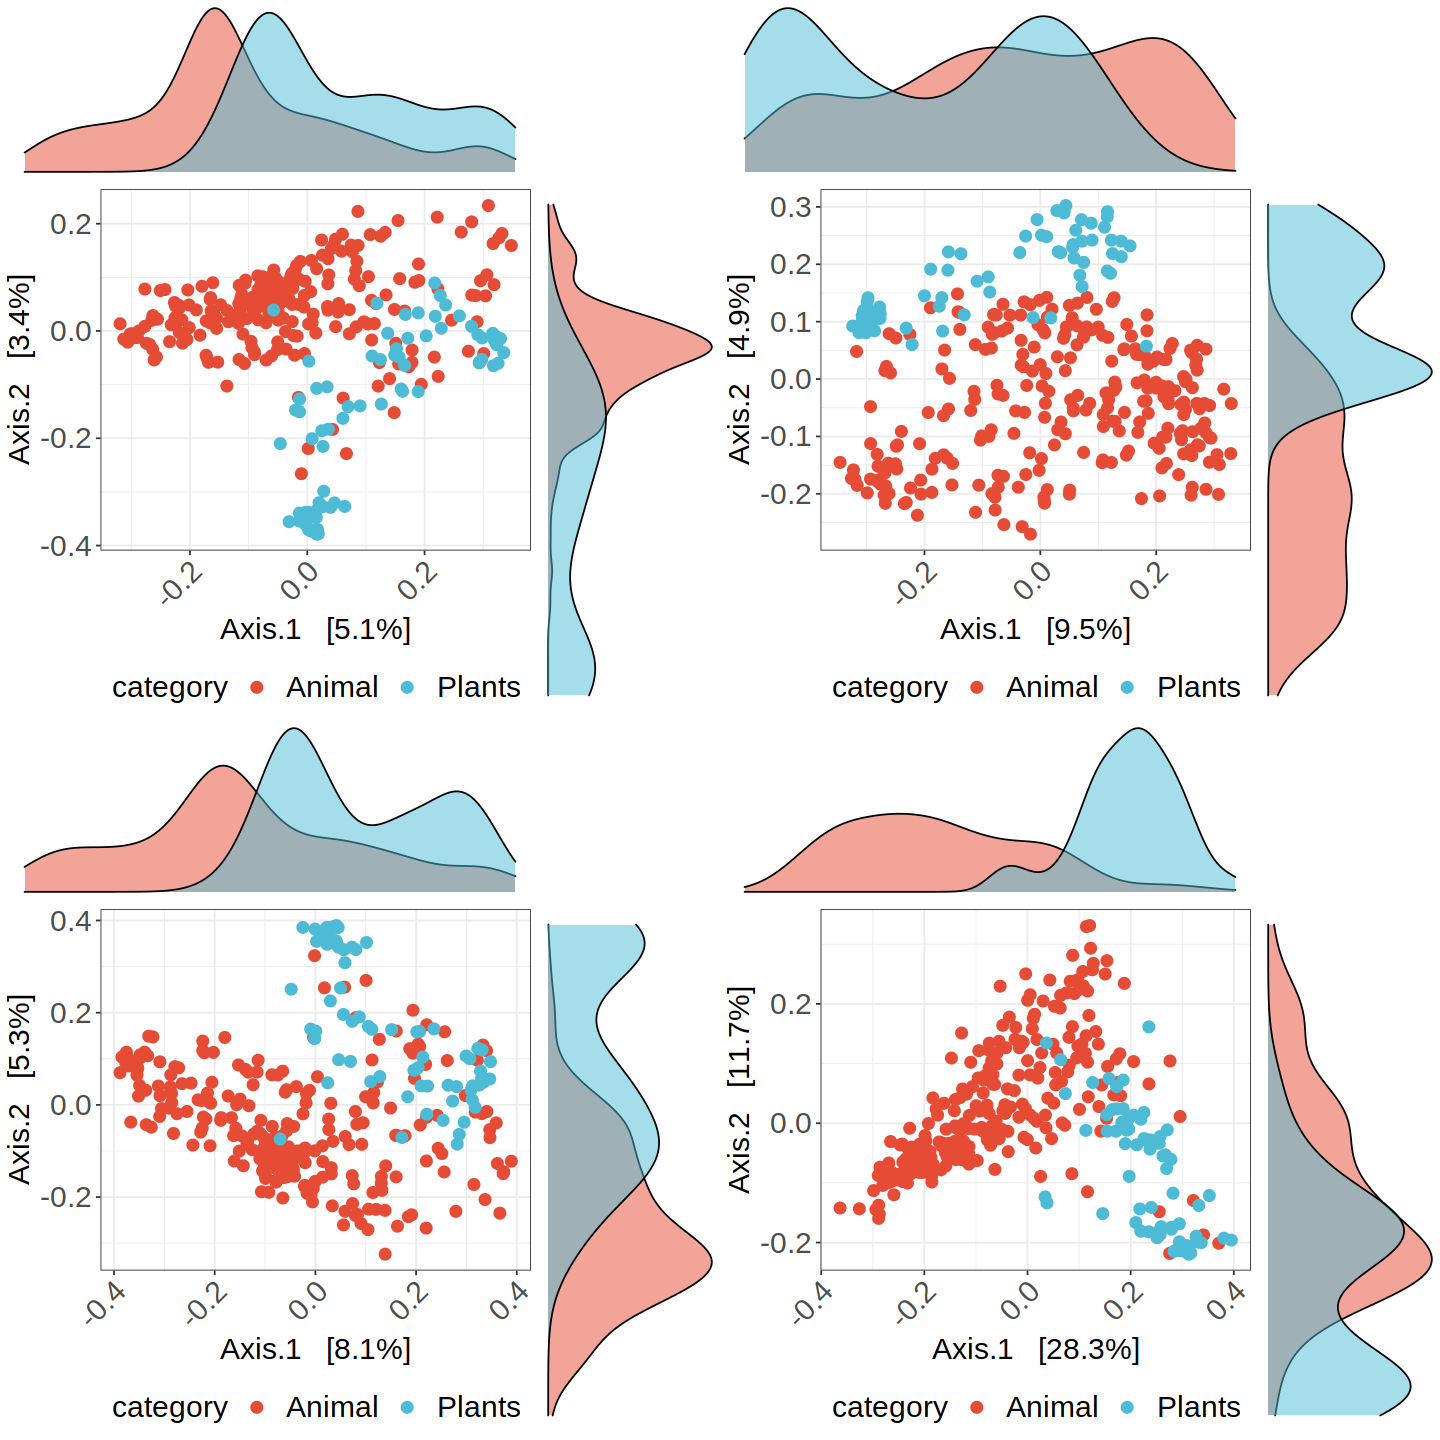

In [32]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.host,jaccard.plot,"category",richness.estimates.host),
            plot_grid_pcoa(unifrac.host,unifrac.plot,"category",richness.estimates.host),
            plot_grid_pcoa(bray.host,bray.plot,"category",richness.estimates.host),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot,"category",richness.estimates.host),
            nrow=2)


##### ANOSIM

In [33]:
cat.var = get_variable(subset.host,"category")

In [34]:
cat.anosim.jacc = anosim(jaccard.dist,cat.var)
cat.anosim.unifrac = anosim(unifrac.dist,cat.var)
cat.anosim.bray = anosim(bray.dist,cat.var)
cat.anosim.wunifrac = anosim(wunifrac.dist,cat.var)

In [35]:
anosim.results.cat = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(cat.anosim.jacc$signif,cat.anosim.jacc$statistic),
    "bray" = c(cat.anosim.bray$signif,cat.anosim.bray$statistic),
    "unifrac" = c(cat.anosim.unifrac$signif,cat.anosim.unifrac$statistic),
    "wunifrac" = c(cat.anosim.wunifrac$signif,cat.anosim.wunifrac$statistic))

In [36]:
anosim.results.cat

col          jaccard     bray        unifrac   wunifrac 
1 significance  0.94300000  0.94800000 0.0010000 0.0010000
2 R_statistic  -0.05142361 -0.05142361 0.1600603 0.3655145

##### Wilcoxon on PCoA axis

In [59]:
#Get ordination vectors
ord.vectors = list(jaccard.vector = getOrdinationVectors(jaccard.host,richness.estimates.host),
    bray.vector = getOrdinationVectors(bray.host,richness.estimates.host),
    unifrac.vector = getOrdinationVectors(unifrac.host,richness.estimates.host), 
    wunifrac.vector = getOrdinationVectors(wunifrac.host,richness.estimates.host))

Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


In [60]:
ord.wilcoxon.list.cat = lapply(ord.vectors,wilcoxonOrdinationAxis,"category")

In [61]:
wilcoxon.axis.stats.cat <- rbind(
  ord.wilcoxon.list.cat[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.cat[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.cat[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.cat[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [62]:
wilcoxon.axis.stats.cat

Animal       Animal.1     Animal.2     Animal.3     OrdMethod
Plants  1.939744e-15 2.715935e-25 9.267679e-01 9.946075e-06 Jaccard  
Plants1 7.269871e-15 1.078657e-23 5.565444e-04 5.552213e-03 Bray     
Plants2 1.696987e-07 6.059770e-34 4.311717e-04 9.357631e-08 Unifrac  
Plants3 1.886289e-33 9.355894e-10 3.317722e-05 1.932435e-04 wUnifrac

#### By biome_2

In [63]:
jaccard.plot.biome2 = plot_color_discrete(subset.host,jaccard.host,"biome_2")
bray.plot.biome2 = plot_color_discrete(subset.host,bray.host,"biome_2")
unifrac.plot.biome2 = plot_color_discrete(subset.host,unifrac.host,"biome_2")
wunifrac.plot.biome2 = plot_color_discrete(subset.host,wunifrac.host,"biome_2")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


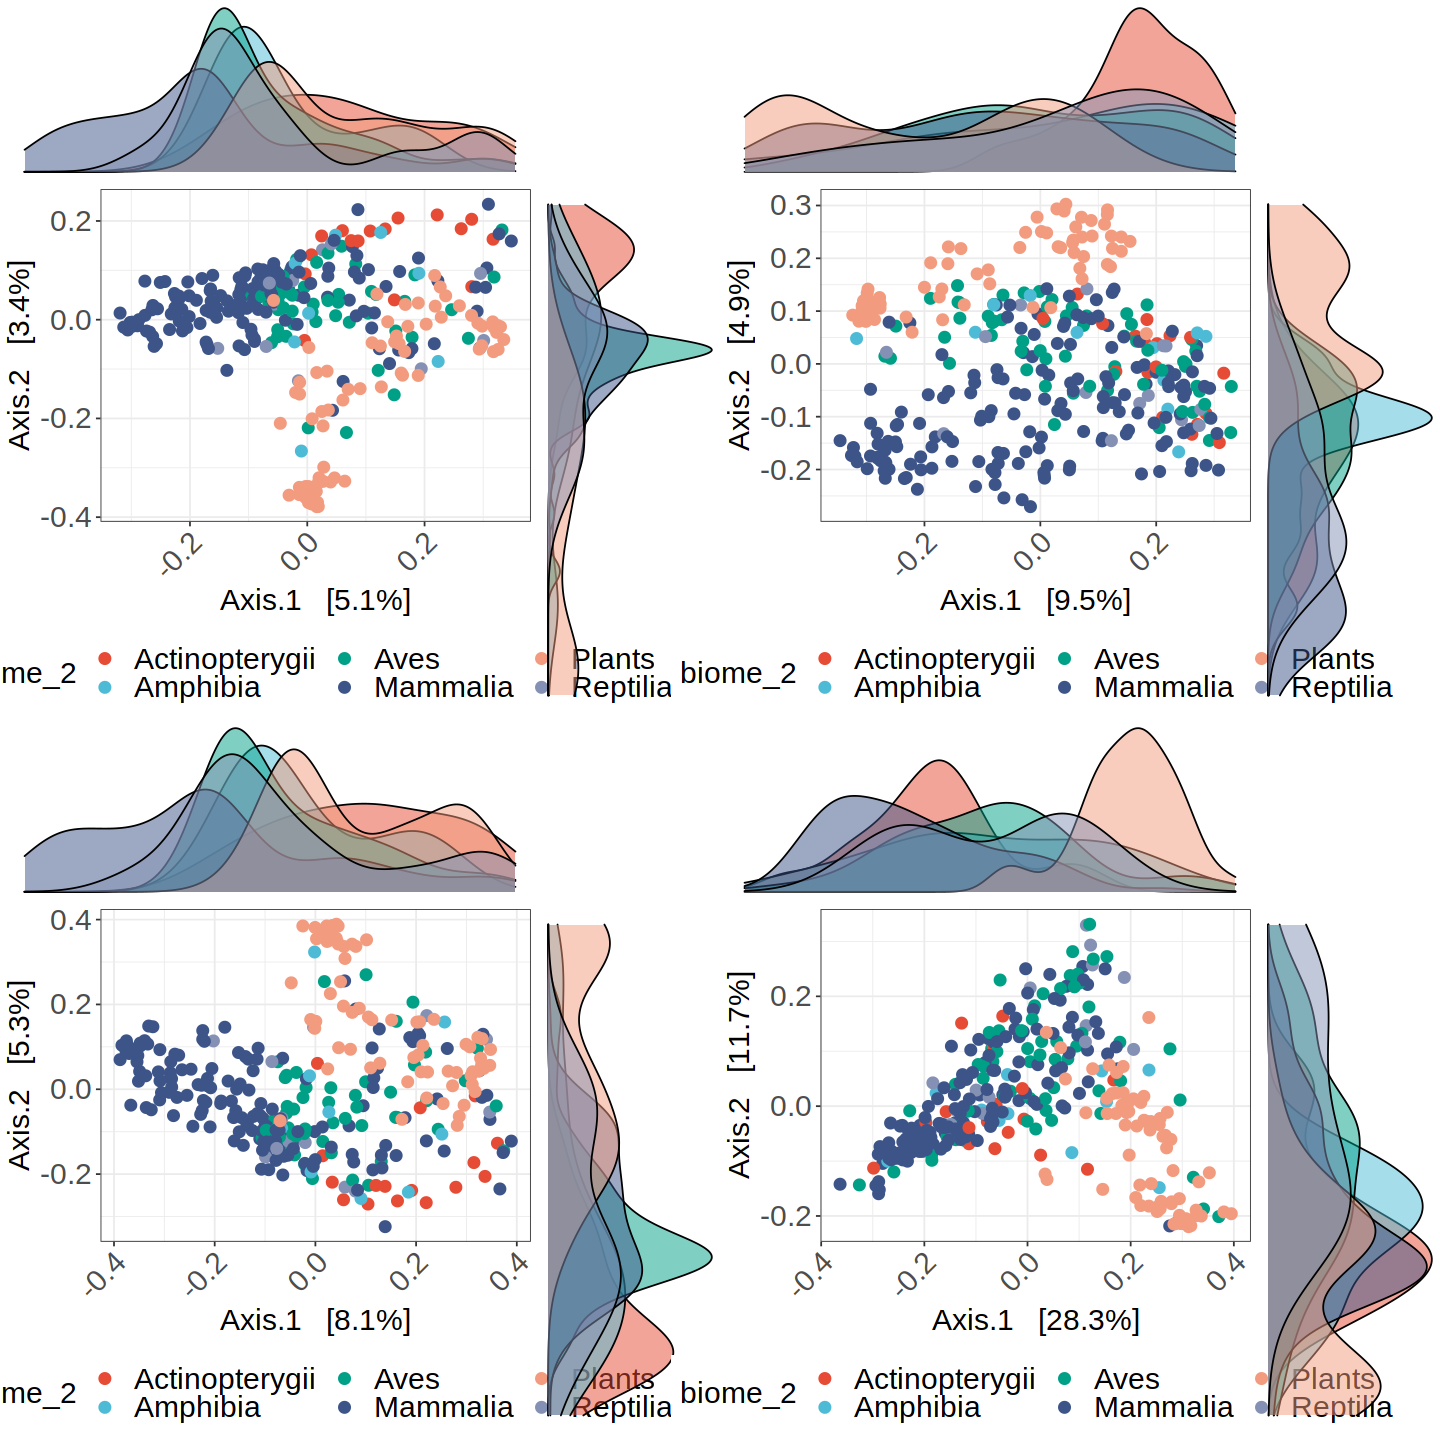

In [64]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.host,jaccard.plot.biome2,"biome_2",richness.estimates.host),
            plot_grid_pcoa(unifrac.host,unifrac.plot.biome2,"biome_2",richness.estimates.host),
            plot_grid_pcoa(bray.host,bray.plot.biome2,"biome_2",richness.estimates.host),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot.biome2,"biome_2",richness.estimates.host),
            nrow=2)


##### ANOSIM

In [65]:
biome2.var = get_variable(subset.host,"biome_2")

In [66]:
biome2.anosim.jacc = anosim(jaccard.dist,biome2.var)
biome2.anosim.unifrac = anosim(unifrac.dist,biome2.var)
biome2.anosim.bray = anosim(bray.dist,biome2.var)
biome2.anosim.wunifrac = anosim(wunifrac.dist,biome2.var)

In [67]:
anosim.results.biome2 = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(biome2.anosim.jacc$signif,biome2.anosim.jacc$statistic),
    "bray" = c(biome2.anosim.bray$signif,biome2.anosim.bray$statistic),
    "unifrac" = c(biome2.anosim.unifrac$signif,biome2.anosim.unifrac$statistic),
    "wunifrac" = c(biome2.anosim.wunifrac$signif,biome2.anosim.wunifrac$statistic))

In [68]:
anosim.results.biome2

col          jaccard   bray      unifrac   wunifrac 
1 significance 0.0010000 0.0010000 0.0010000 0.0010000
2 R_statistic  0.1762926 0.1762926 0.2158166 0.3028173

##### Wilcoxon on PCoA axis

In [97]:
ord.wilcoxon.list.biome2 = lapply(ord.vectors,wilcoxonOrdinationAxis,"biome_2")

In [98]:
wilcoxon.axis.stats.biome2 <- rbind(
  ord.wilcoxon.list.biome2[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.biome2[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.biome2[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.biome2[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [99]:
wilcoxon.axis.stats.biome2

axis1.Actinopterygii axis1.Amphibia axis1.Aves   axis1.Mammalia
Amphibia  1.030288e-01                   NA             NA           NA  
Aves      6.165120e-03         0.2801814426             NA           NA  
Mammalia  4.585433e-06         0.0028136019   2.421378e-08           NA  
Plants    9.263952e-01         0.0251043098   8.582637e-07 1.384454e-17  
Reptilia  5.045311e-02         0.2816270955   6.156326e-01 1.144630e-02  
Amphibia1 9.296046e-02                   NA             NA           NA  
Aves1     4.910515e-03         0.2522860434             NA           NA  
Mammalia1 2.830291e-06         0.0028136019   1.995146e-08           NA  
Plants1   7.153634e-01         0.0242224053   1.357786e-06 3.119933e-17  
Reptilia1 5.045311e-02         0.2816270955   6.253131e-01 1.001830e-02  
Amphibia2 2.974612e-01                   NA             NA           NA  
Aves2     4.725682e-03         0.5929845297             NA           NA  
Mammalia2 1.493072e-05         0.1424603713   1.057797e-02           NA  
Plants2   4.628325e-08         0.0106059762   5.449623e-06 2.171708e-03  
Reptilia2 1.580009e-01         0.8931462287   5.929845e-01 6.023986e-02  
Amphibia3 1.826866e-01                   NA             NA           NA  
Aves3     2.712915e-02         0.8792283947             NA           NA  
Mammalia3 1.826866e-01         0.0233913035   4.507191e-08           NA  
Plants3   8.624676e-10         0.0001528607   2.697676e-15 2.808122e-31  
Reptilia3 1.826866e-01         0.8666778840   8.666779e-01 3.373560e-03  
          axis1.Plants axis2.Actinopterygii axis2.Amphibia axis2.Aves  
Amphibia            NA 4.047928e-02                   NA             NA
Aves                NA 3.763264e-05         5.499785e-01             NA
Mammalia            NA 1.893398e-05         5.499785e-01   8.841865e-01
Plants              NA 2.355585e-09         3.420385e-04   3.172259e-14
Reptilia  6.165120e-03 2.073990e-03         5.835251e-01   9.242214e-01
Amphibia1           NA 1.859059e-01                   NA             NA
Aves1               NA 1.882004e-04         3.341711e-01             NA
Mammalia1           NA 1.474928e-05         2.102682e-01   2.102682e-01
Plants1             NA 2.666371e-09         1.882004e-04   1.148822e-15
Reptilia1 1.001830e-02 1.888982e-02         6.181353e-01   9.526079e-01
Amphibia2           NA 4.413787e-01                   NA             NA
Aves2               NA 2.884143e-01         8.553183e-01             NA
Mammalia2           NA 1.540026e-03         2.237213e-03   3.635682e-12
Plants2             NA 3.476904e-09         1.252624e-05   3.367624e-16
Reptilia2 7.344291e-04 4.352595e-01         1.461931e-01   6.394805e-02
Amphibia3           NA 7.225536e-01                   NA             NA
Aves3               NA 1.691681e-02         3.565806e-02             NA
Mammalia3           NA 7.080627e-01         8.528172e-01   4.031446e-04
Plants3             NA 3.565806e-02         3.565806e-02   1.723730e-09
Reptilia3 1.152989e-06 3.234503e-03         1.691681e-02   1.994469e-01
          axis2.Mammalia axis2.Plants ⋯ axis3.Amphibia axis3.Aves  
Amphibia            NA             NA ⋯          NA              NA
Aves                NA             NA ⋯ 0.151241463              NA
Mammalia            NA             NA ⋯ 0.007163236    7.352166e-06
Plants    4.645415e-21             NA ⋯ 0.095521523    1.697146e-01
Reptilia  9.242214e-01   1.337207e-04 ⋯ 0.432644795    7.562812e-01
Amphibia1           NA             NA ⋯          NA              NA
Aves1               NA             NA ⋯ 0.781605695              NA
Mammalia1           NA             NA ⋯ 0.027984430    7.095574e-06
Plants1   5.458188e-18             NA ⋯ 0.885018176    7.763295e-01
Reptilia1 7.821304e-01   2.022352e-04 ⋯ 0.978571813    7.816057e-01
Amphibia2           NA             NA ⋯          NA              NA
Aves2               NA             NA ⋯ 0.679213784              NA
Mammalia2           NA             NA ⋯ 0.119551449    1.719

#### Mammals vs. non-mammals

In [72]:
#subset.host.filt.no.mammals = subset_samples(subset.host,biome_2!="Mammalia")
subset.host.filt.animals=subset_samples(subset.host,category=="Animal")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [73]:
subset.host.filt.animals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 269 samples ]
sample_data() Sample Data:       [ 269 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1637 internal nodes ]

In [74]:
jaccard.animal.filt = ordinate(subset.host.filt.animals,distance="jaccard",method="PCoA")
unifrac.animal.filt = ordinate(subset.host.filt.animals,distance="unifrac",method="PCoA")
bray.animal.filt = ordinate(subset.host.filt.animals,distance="bray",method="PCoA")
wunifrac.animal.filt = ordinate(subset.host.filt.animals,distance="wunifrac",method="PCoA")

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the number of rows [1638]”


In [75]:
jaccard.plot.animals = plot_color_discrete(subset.host.filt.animals,jaccard.animal.filt,"mammals")
bray.plot.animals = plot_color_discrete(subset.host.filt.animals,bray.animal.filt,"mammals")
unifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,unifrac.animal.filt,"mammals")
wunifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,wunifrac.animal.filt,"mammals")

Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


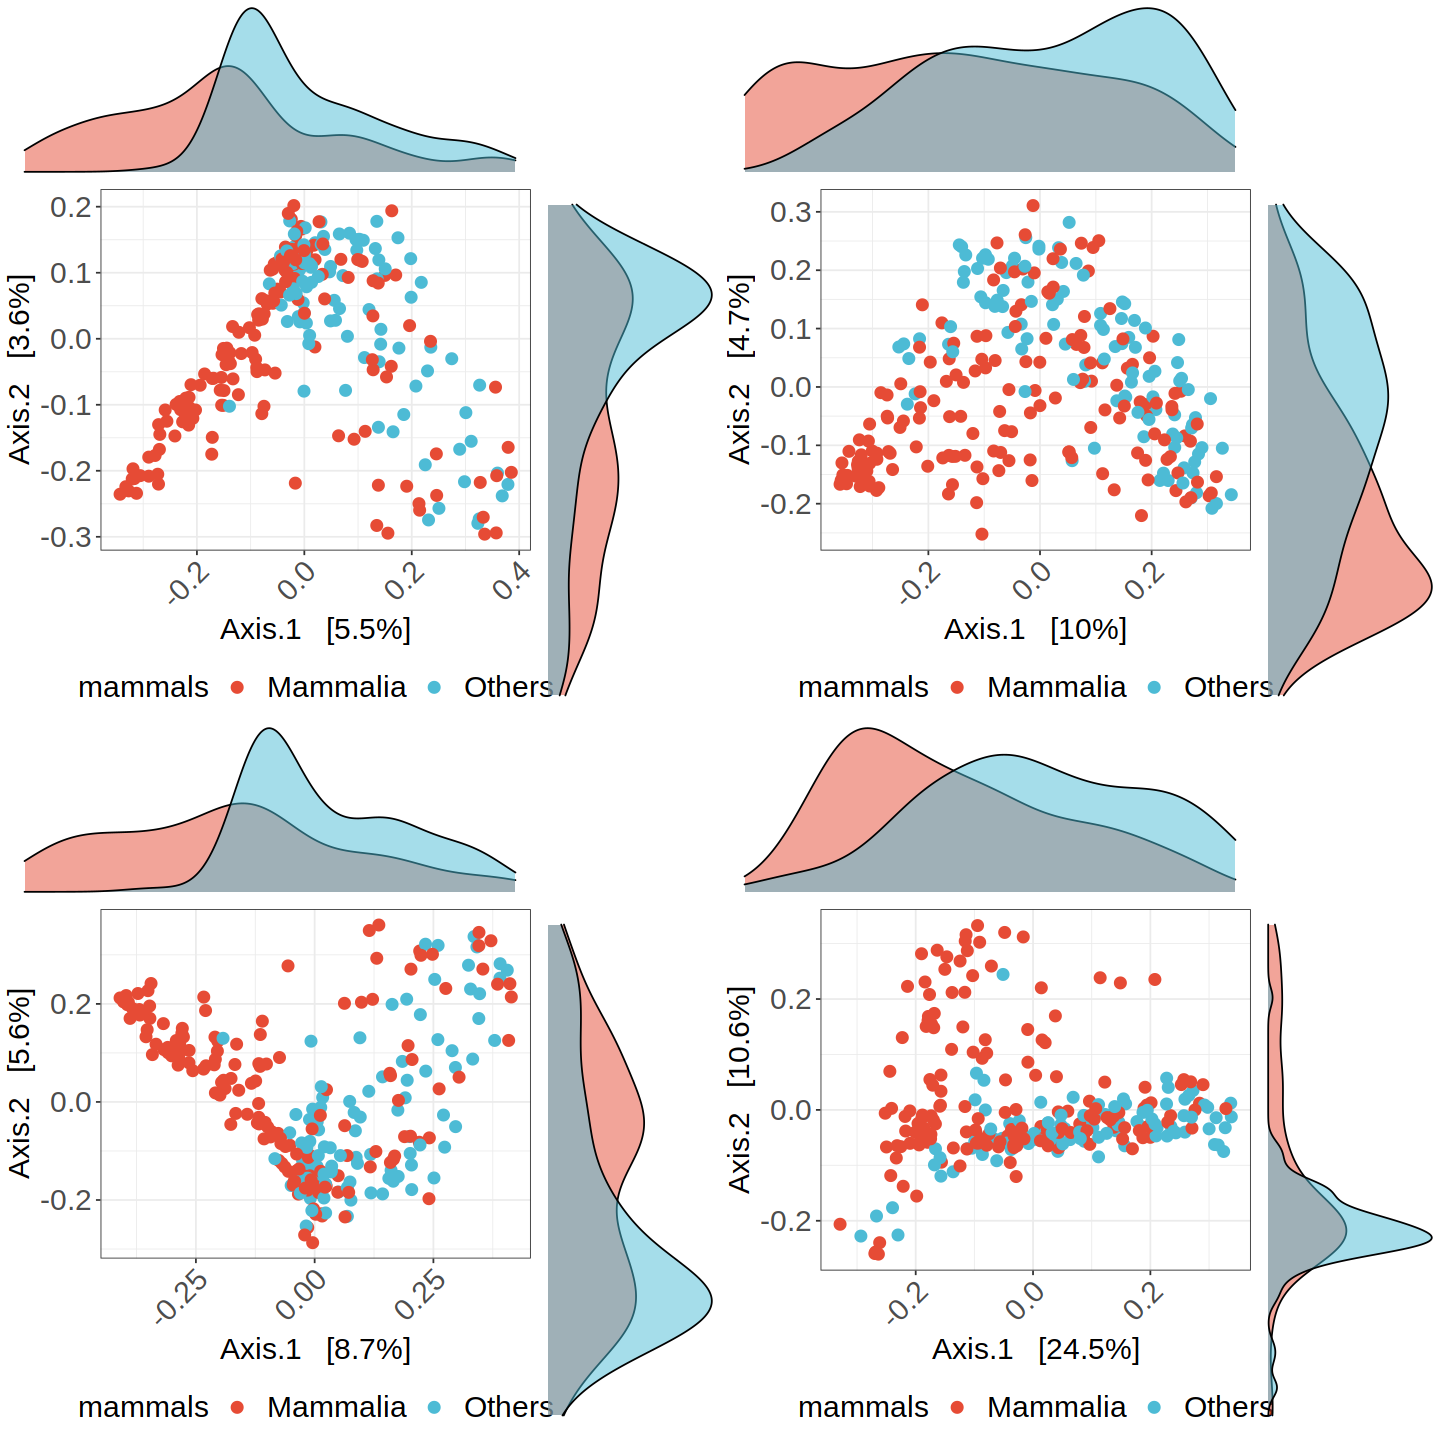

In [76]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.animal.filt,jaccard.plot.animals,"mammals",richness.estimates.host),
            plot_grid_pcoa(unifrac.animal.filt,unifrac.plot.animals,"mammals",richness.estimates.host),
            plot_grid_pcoa(bray.animal.filt,bray.plot.animals,"mammals",richness.estimates.host),
            plot_grid_pcoa(wunifrac.animal.filt,wunifrac.plot.animals,"mammals",richness.estimates.host),
            nrow=2)


##### ANOSIM

In [77]:
mammals.var = get_variable(subset.host,"mammals")

In [78]:
mammals.anosim.jacc = anosim(jaccard.dist,mammals.var)
mammals.anosim.unifrac = anosim(unifrac.dist,mammals.var)
mammals.anosim.bray = anosim(bray.dist,mammals.var)
mammals.anosim.wunifrac = anosim(wunifrac.dist,mammals.var)

In [79]:
anosim.results.mammals = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(mammals.anosim.jacc$signif,mammals.anosim.jacc$statistic),
    "bray" = c(mammals.anosim.bray$signif,mammals.anosim.bray$statistic),
    "unifrac" = c(mammals.anosim.unifrac$signif,mammals.anosim.unifrac$statistic),
    "wunifrac" = c(mammals.anosim.wunifrac$signif,mammals.anosim.wunifrac$statistic))

In [80]:
anosim.results.mammals

col          jaccard   bray      unifrac   wunifrac 
1 significance 0.0010000 0.0010000 0.0010000 0.0010000
2 R_statistic  0.1858762 0.1858762 0.1395338 0.2226786

##### Wilcoxon on PCoA axis

In [81]:
ord.wilcoxon.list.mammals = lapply(ord.vectors,wilcoxonOrdinationAxis,"mammals")

In [82]:
wilcoxon.axis.stats.mammals <- rbind(
  ord.wilcoxon.list.mammals[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.mammals[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.mammals[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.mammals[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [83]:
wilcoxon.axis.stats.mammals

Animal       Animal.1     Animal.2     Animal.3     OrdMethod
Plants  1.939744e-15 2.715935e-25 9.267679e-01 9.946075e-06 Jaccard  
Plants1 7.269871e-15 1.078657e-23 5.565444e-04 5.552213e-03 Bray     
Plants2 1.696987e-07 6.059770e-34 4.311717e-04 9.357631e-08 Unifrac  
Plants3 1.886289e-33 9.355894e-10 3.317722e-05 1.932435e-04 wUnifrac

### 3. Pairwise dissimilarity

#### By category

In [84]:
dist.method = c("jaccard","bray","unifrac","wunifrac")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3209] is not a sub-multiple or multiple of the number of rows [1605]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the numbe

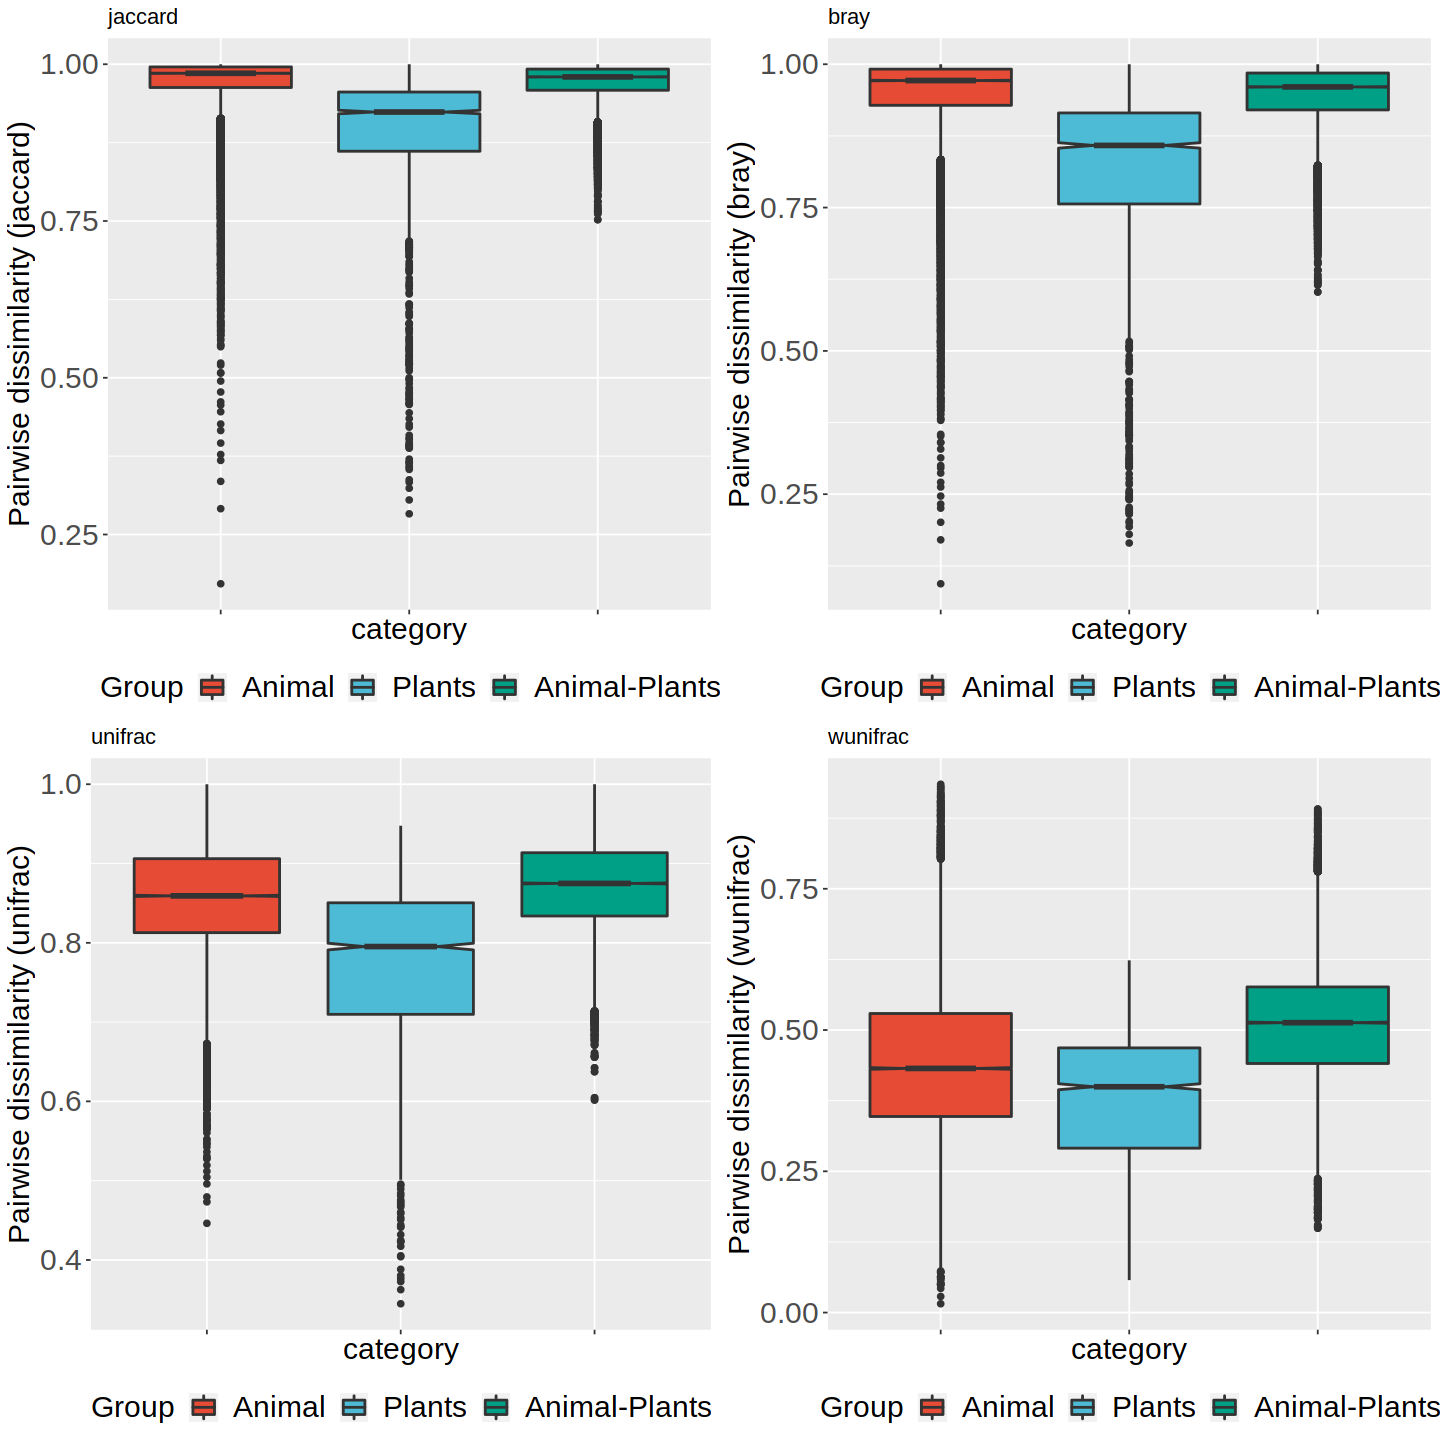

In [85]:
diss.plots.cat = compute_dissimilarity_groups_plots(subset.host,dist.method,"category")

In [86]:
diss.plots.cat

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

In [87]:
diss.df.cat = compute_dissimilarity_groups_df(subset.host,dist.method,"category")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3209] is not a sub-multiple or multiple of the number of rows [1605]”
Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [3275] is not a sub-multiple or multiple of the numbe

#### By biome_2

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



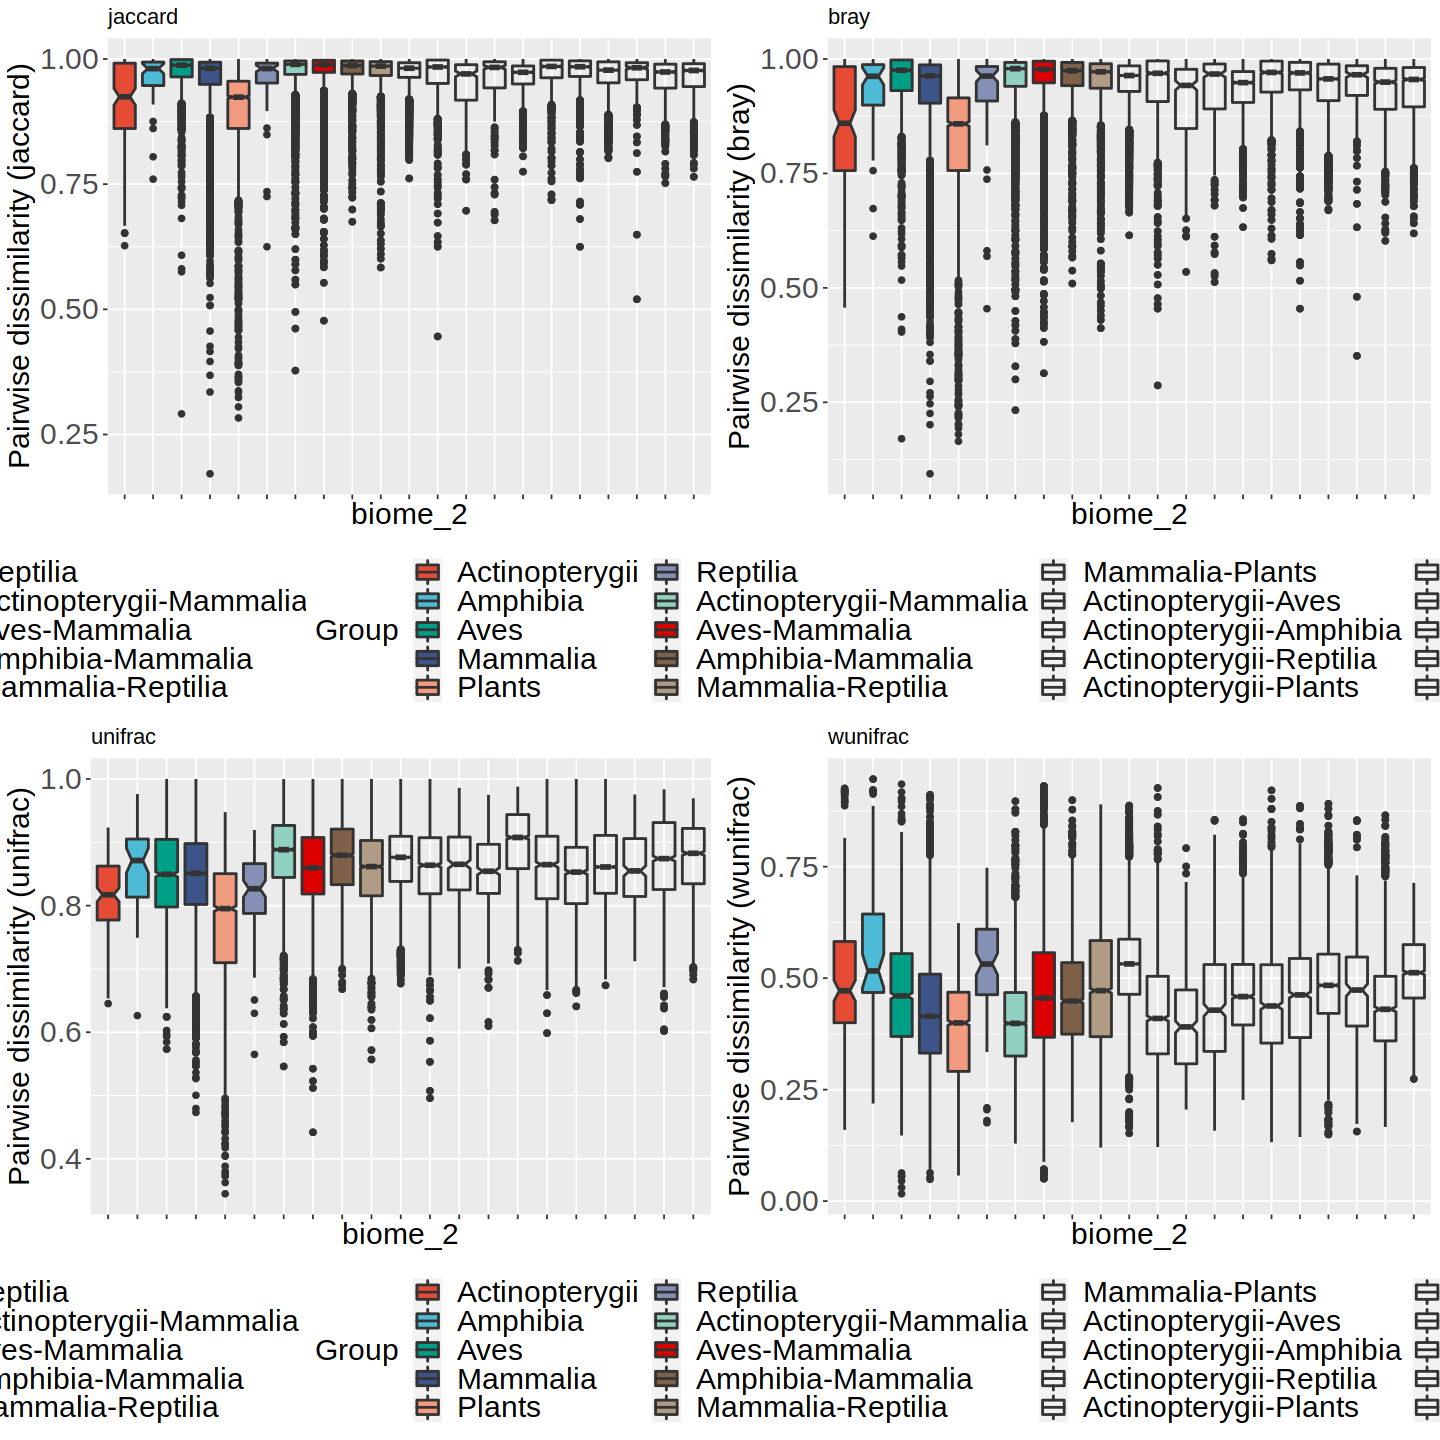

In [88]:
diss.plots.biome2 = compute_dissimilarity_groups_plots(subset.host,dist.method,"biome_2")

In [89]:
diss.df.biome2 = compute_dissimilarity_groups_df(subset.host,dist.method,"biome_2")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



### 4. OTU trees

In [90]:
host.tre.top=plot_tree(phyloseq_filter_top_taxa(subset.host,perc=10),color="category",label.tips="family")+scale_color_npg()

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



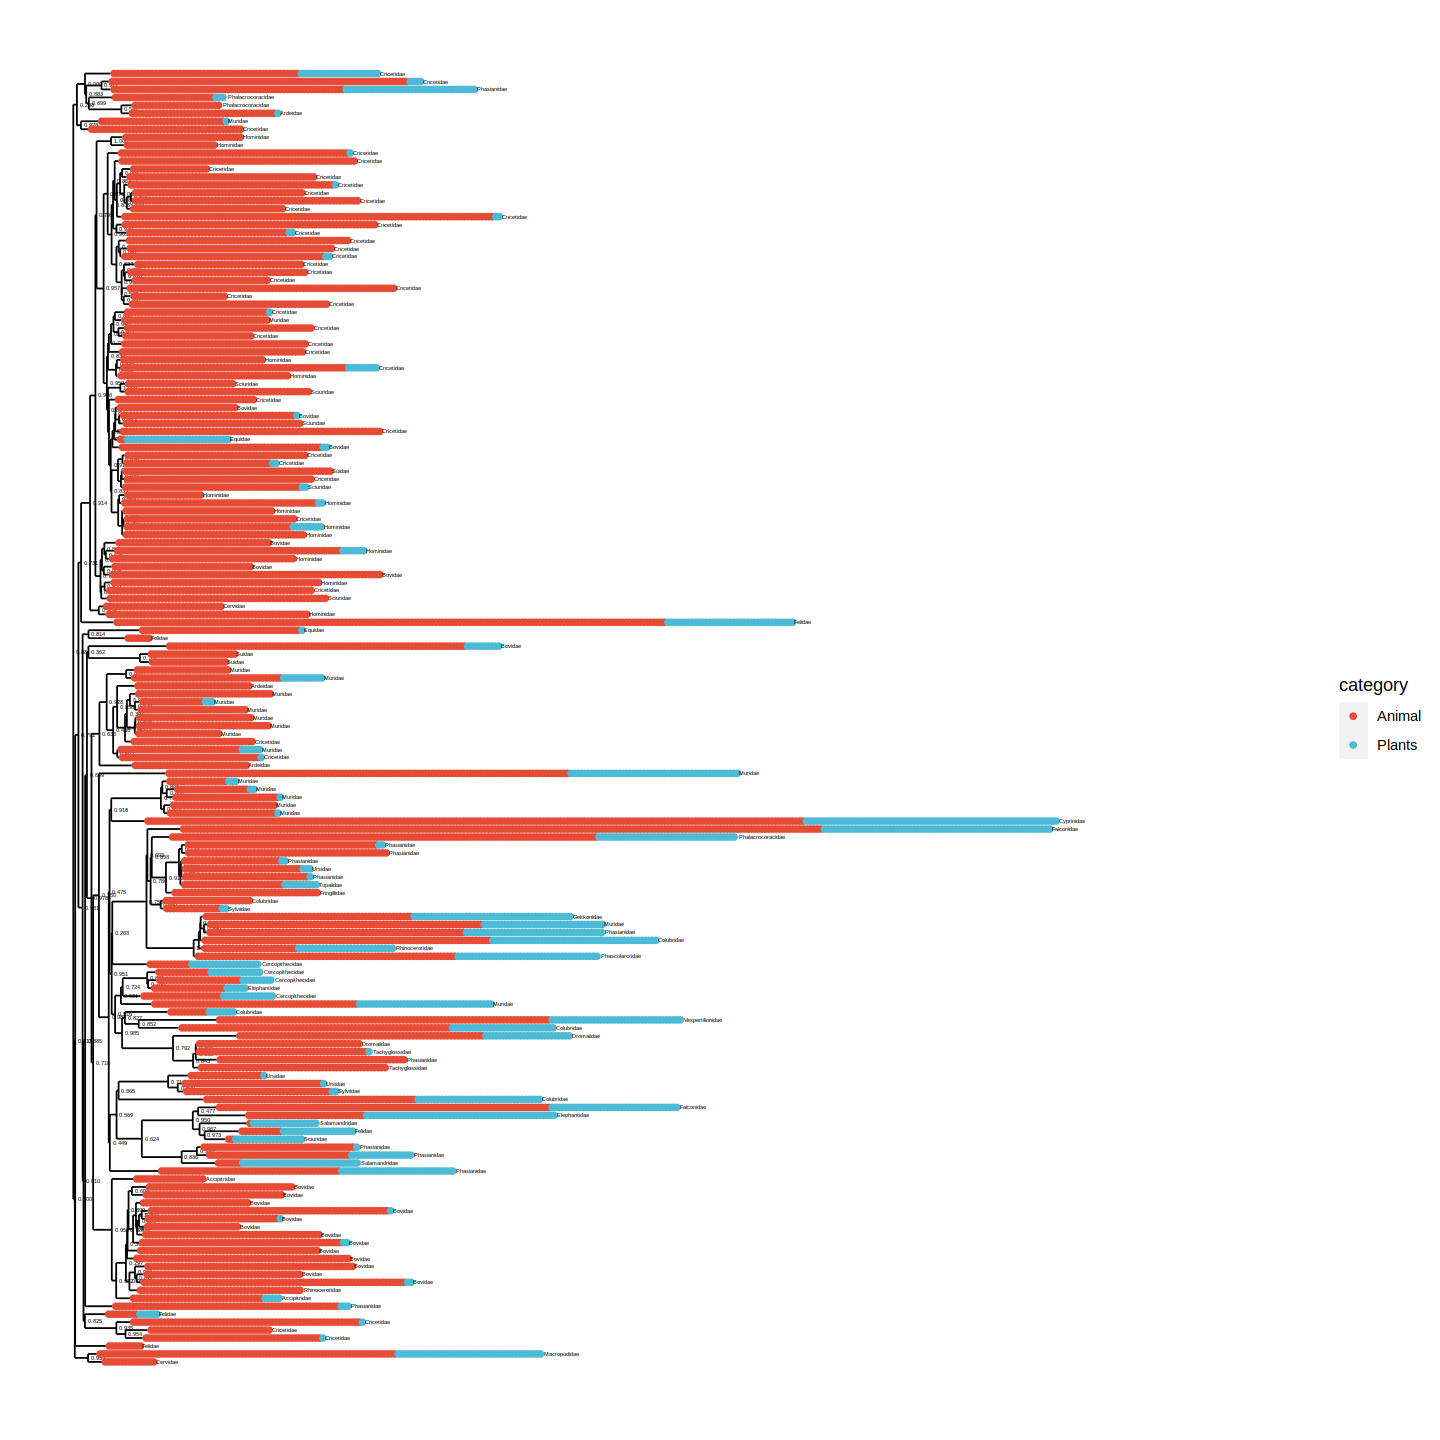

In [91]:
host.tre.top

In [92]:
tre.host.top.0.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=10),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 0.1%")

tre.host.top.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=30),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 1%")

tre.host.top.5=plot_tree(phyloseq_filter_top_taxa(subset.host,n=50),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 5%")

tre.host.top.10=plot_tree(phyloseq_filter_top_taxa(subset.host,n=100),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 10%")


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plo

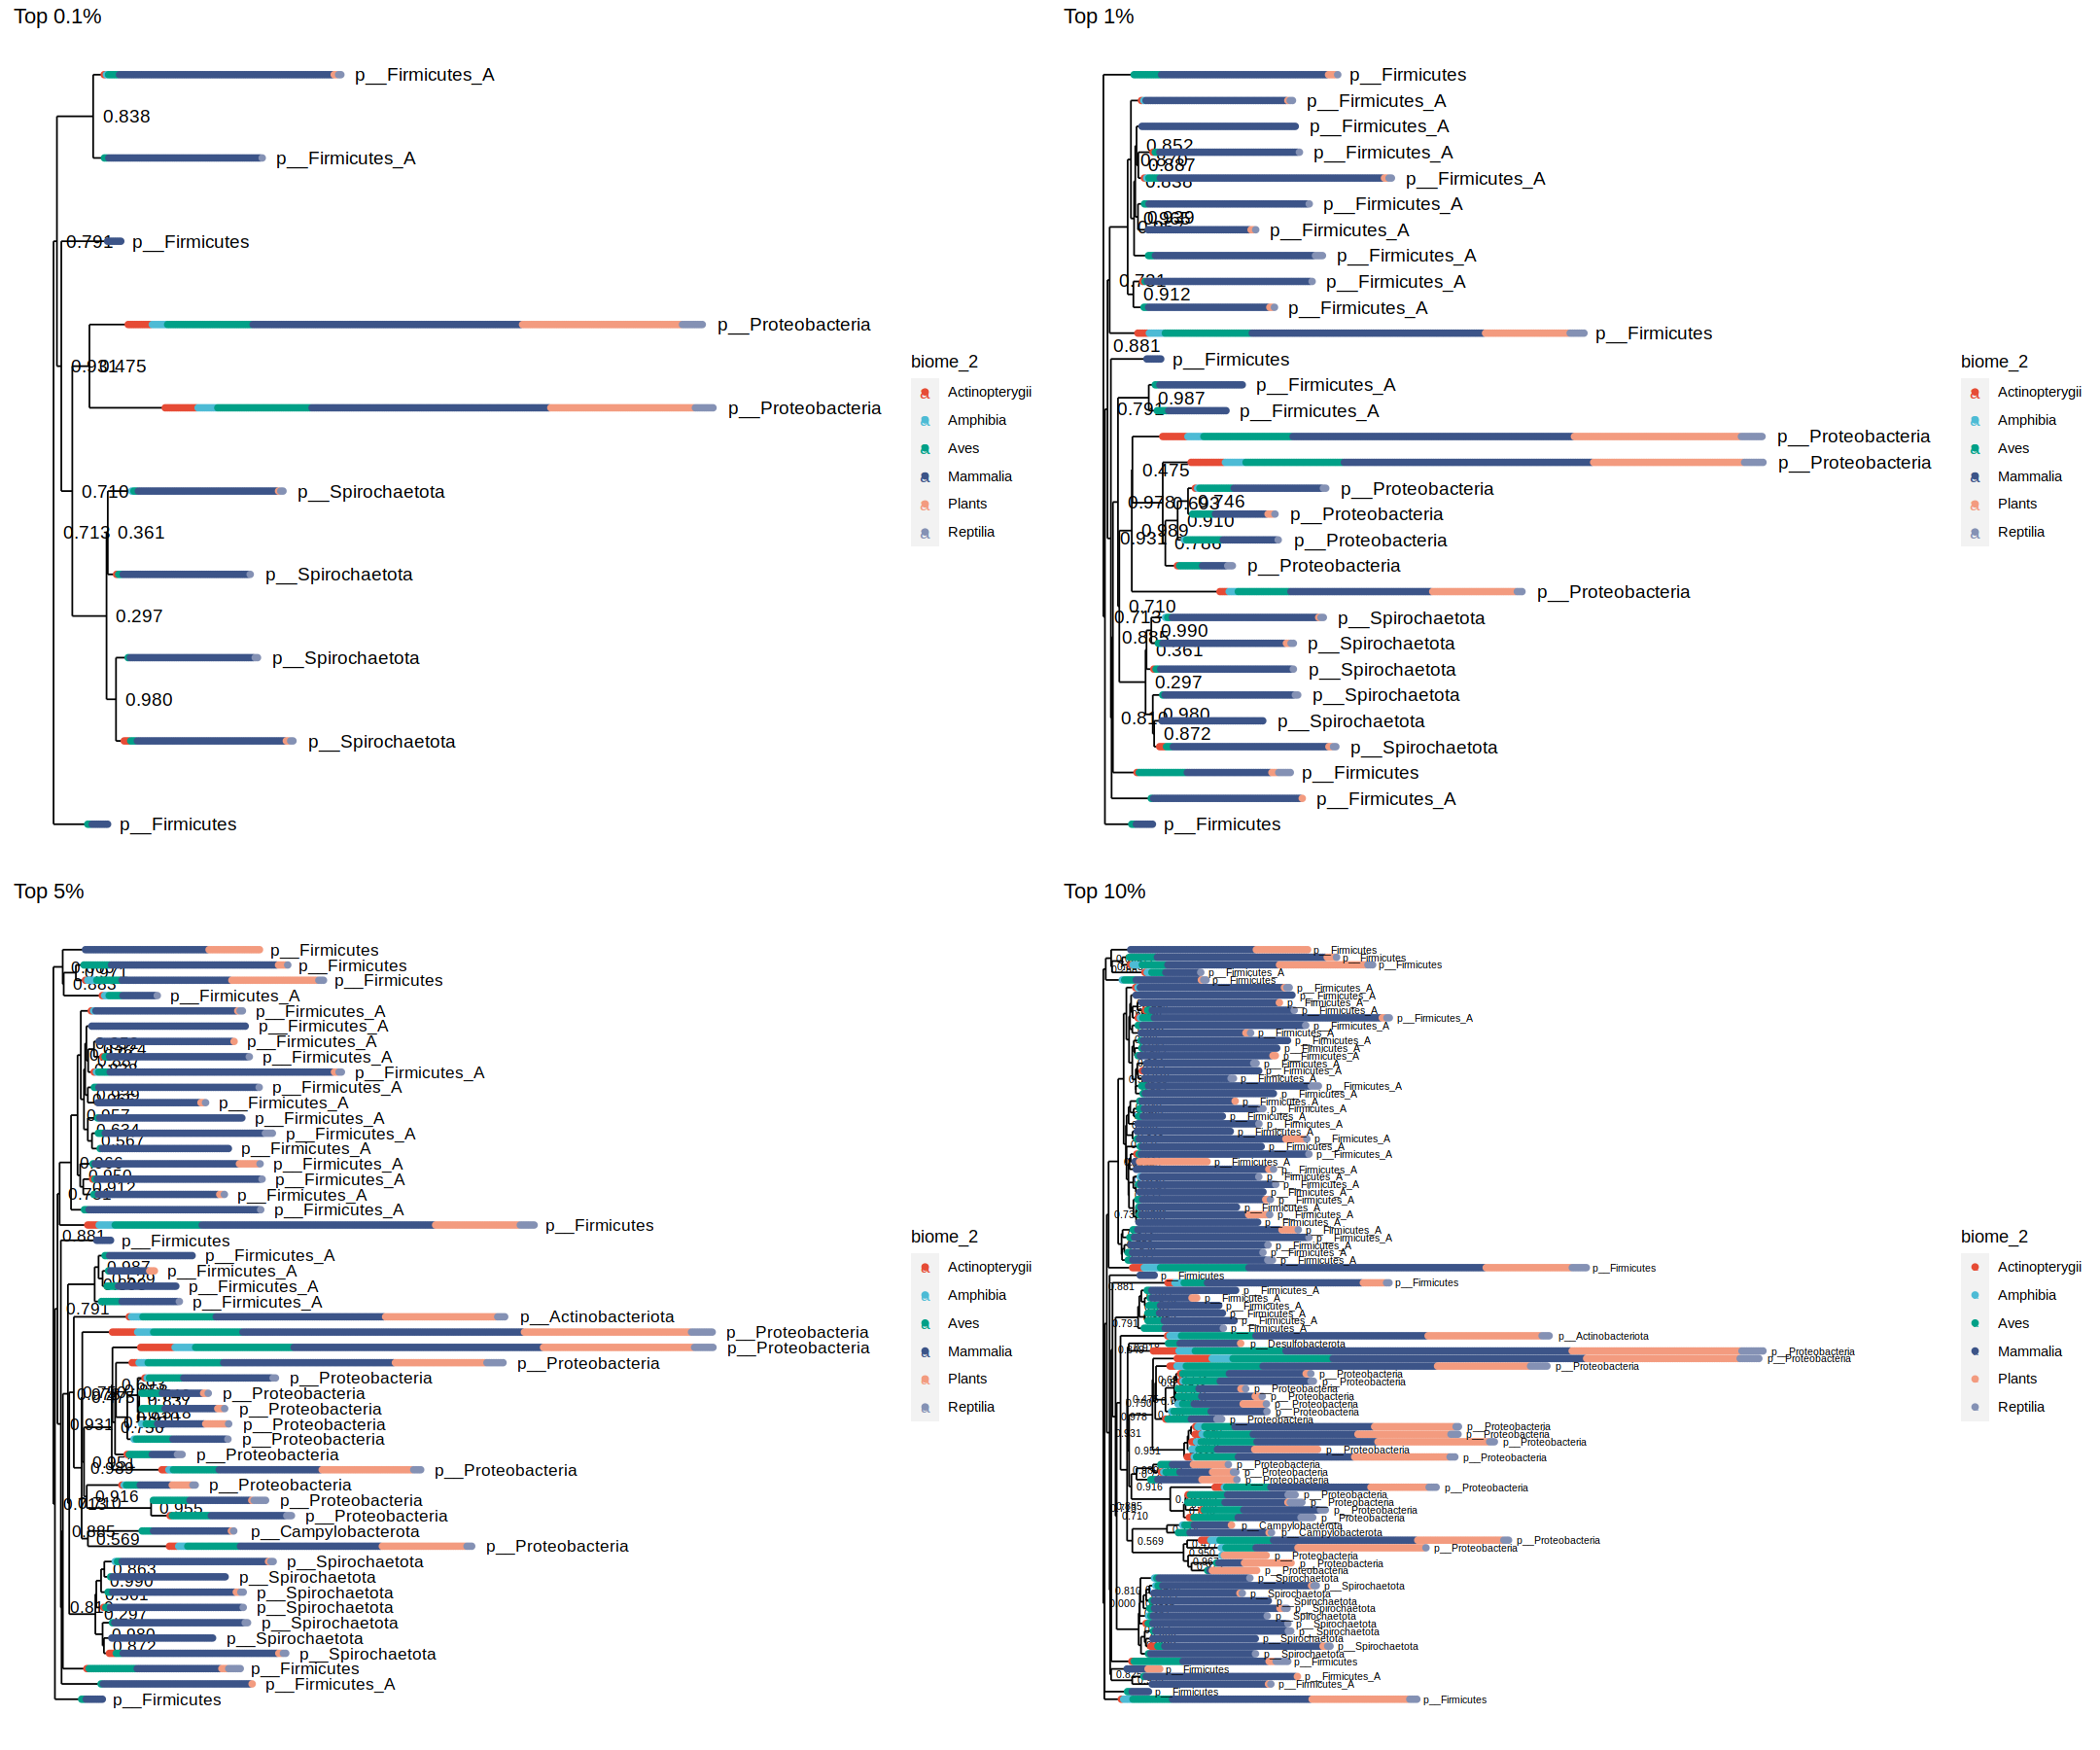

In [93]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(tre.host.top.0.1,
             tre.host.top.1,
             tre.host.top.5,
             tre.host.top.10,
             nrow=2)

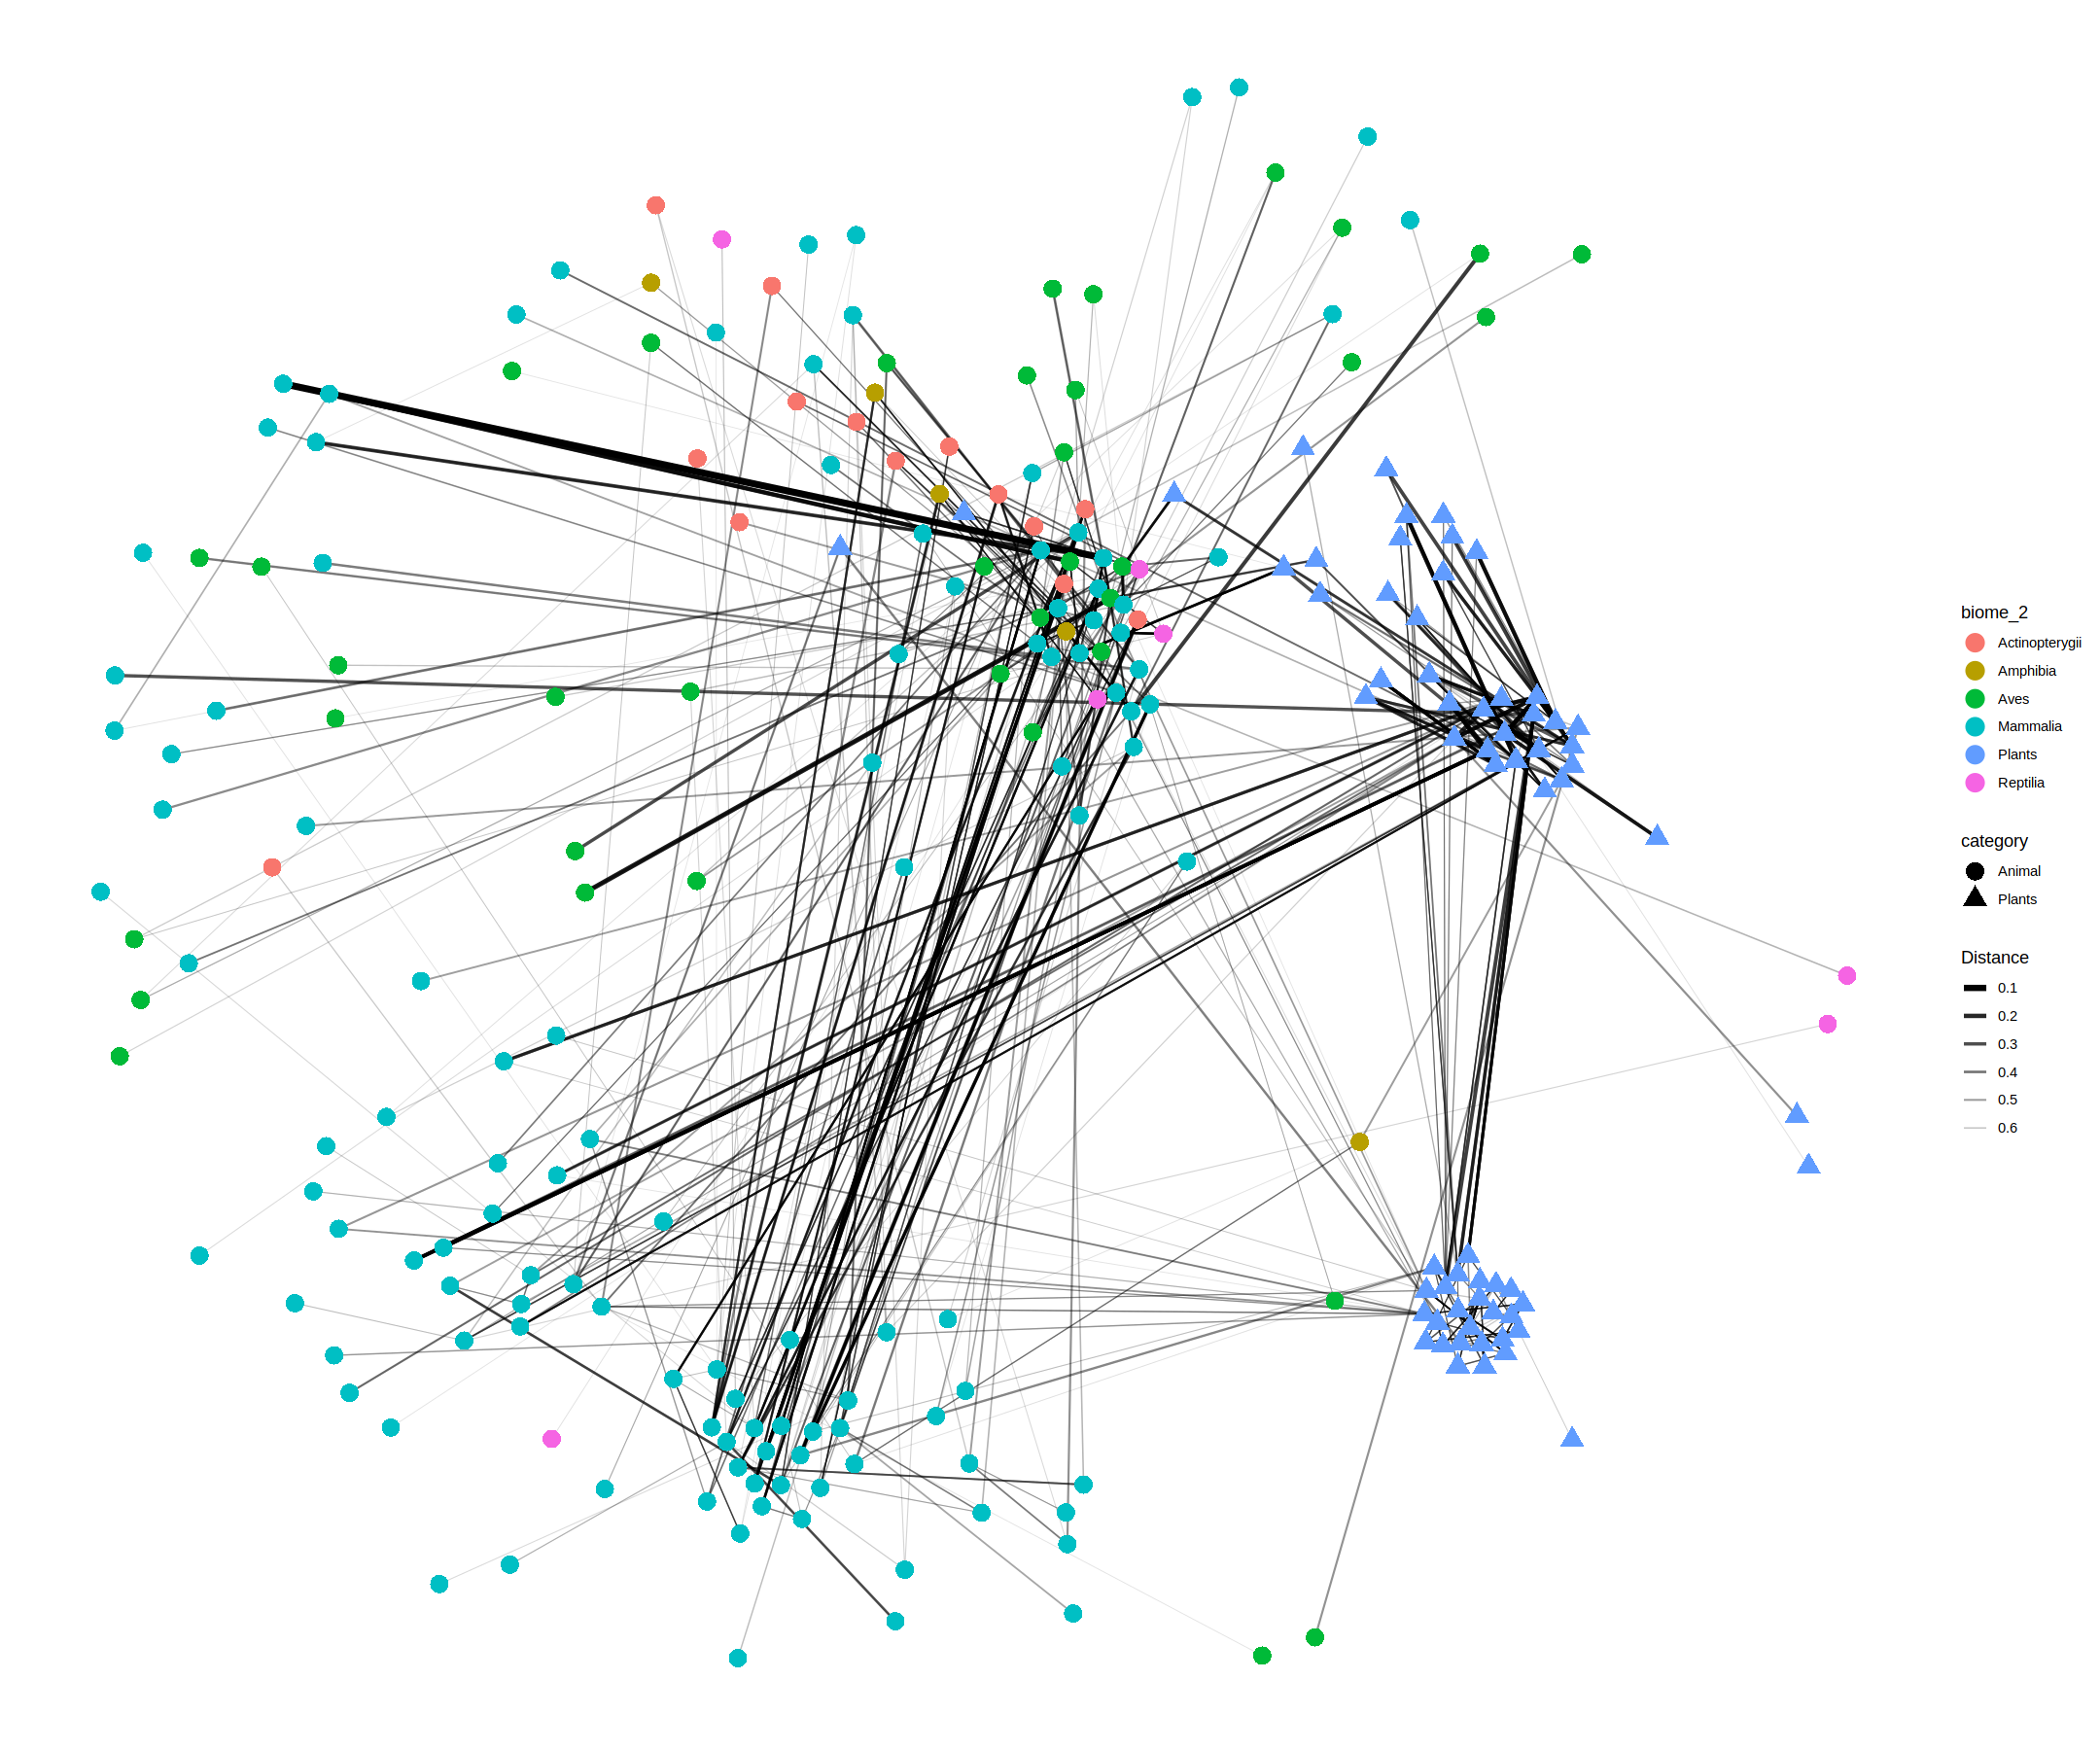

In [94]:
plot_net(subset.host, maxdist=0.7, color="biome_2", shape="category")

#### OTU tree of DA taxa

In [95]:
tre.DA.firm=plot_tree(subset_taxa(DAs_fla_host,Phylum==c("p__Firmicutes_A","p__Firmicutes_C","p__Firmicutes")),color="mammals", label.tips="Species", ladderize="left", nodelabf=nodeplotboot())+scale_color_npg()

tre.DA.proteo=plot_tree(subset_taxa(DAs_fla_host,Phylum=="p__Proteobacteria"),color="mammals",label.tips="Species",ladderize="left",nodelabf=nodeplotboot())+scale_color_npg()

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'physeq' in selecting a method for function 'phy_tree': error in evaluating the argument 'object' in selecting a method for function 'tax_table': object 'DAs_fla_host' not found


In [ ]:
tre.DA.firm
tre.DA.proteo

In [ ]:
sessionInfo()